In [24]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline

In [2]:
pm_10_with_weather = pd.read_csv("./opendata_pm10_weather.csv")

In [3]:
pm_10_with_weather.head()

,Unnamed: 0,temp_min,temp_max,pressure,humidity,wind_speed,rain_24h,snow_3h,clouds_all,temp_cent,temp_max_cent,temp_min_cent,date_format,location,type,value,season,value_tomorrow
0,0,296.3,303.15,1021.0,20.0,6.0,NaN,NaN,0.0,31.0,31.0,24.15,01.10.2012,Дружба,PM10,30.525970,autumn,39.665600
1,1,296.3,303.15,1021.0,20.0,6.0,NaN,NaN,0.0,31.0,31.0,24.15,01.10.2012,Павлово,PM10,39.665600,autumn,33.634472
2,2,296.3,303.15,1021.0,20.0,6.0,NaN,NaN,0.0,31.0,31.0,24.15,01.10.2012,Надежда,PM10,33.634472,autumn,43.143379
3,3,296.3,303.15,1021.0,20.0,6.0,NaN,NaN,0.0,31.0,31.0,24.15,01.10.2012,Орлов мост,PM10,43.143379,autumn,40.203060
4,4,296.3,303.15,1021.0,20.0,6.0,NaN,NaN,0.0,31.0,31.0,24.15,01.10.2012,Хиподрума,PM10,40.203060,autumn,29.795982


In [5]:
pm_10_full.head()

,Показател,Мерна единица,Дата,средноденонощна норма,Дружба,Павлово,Надежда,Орлов мост,Младост,Хиподрума,Копитото
0,PM10,ug/m3,01.01.2011,50.0,533.884216,550.999512,563.110291,553.935791,NaN,603.592346,5.109693
1,PM10,ug/m3,02.01.2011,50.0,439.790344,497.559631,572.875732,564.641296,NaN,579.076721,14.505280
2,PM10,ug/m3,03.01.2011,50.0,57.218586,38.543324,51.242702,57.585236,NaN,56.097775,4.246218
3,PM10,ug/m3,04.01.2011,50.0,54.860920,55.634865,43.216503,51.556568,NaN,50.372726,17.546654
4,PM10,ug/m3,05.01.2011,50.0,57.547646,32.798817,55.583721,48.208504,NaN,23.785156,19.043219


In [6]:
air_quality_bg_data = pd.read_csv("./pollution_weather_data (1).csv")

In [7]:
air_quality_bg_data.head()

,Unnamed: 0,dt,dt_iso,city_id,city_name,lat_x,lon_x,temp,temp_min,temp_max,...,durP1,ratioP1,P2,durP2,ratioP2,month,month_p,units,subject,hour
0,0,1487869200,2017-02-23 17:00:00 +0000 UTC,727011,NaN,NaN,NaN,287.15,287.15,287.15,...,NaN,NaN,34.25,NaN,NaN,2017-02-01T00:00:00,0,0,0,17
1,1,1487869200,2017-02-23 17:00:00 +0000 UTC,727011,NaN,NaN,NaN,287.15,287.15,287.15,...,NaN,NaN,33.57,NaN,NaN,2017-02-01T00:00:00,0,0,0,17
2,2,1487869200,2017-02-23 17:00:00 +0000 UTC,727011,NaN,NaN,NaN,287.15,287.15,287.15,...,NaN,NaN,30.17,NaN,NaN,2017-02-01T00:00:00,0,0,0,17
3,3,1487869200,2017-02-23 17:00:00 +0000 UTC,727011,NaN,NaN,NaN,287.15,287.15,287.15,...,NaN,NaN,29.73,NaN,NaN,2017-02-01T00:00:00,0,0,0,17
4,4,1487869200,2017-02-23 17:00:00 +0000 UTC,727011,NaN,NaN,NaN,287.15,287.15,287.15,...,NaN,NaN,32.93,NaN,NaN,2017-02-01T00:00:00,0,0,0,17


In [10]:
group_by_hour_air_quality = air_quality_bg_data.groupby('hour').mean()

In [25]:
def plot_by(df, by=["value", "location"], title="Plot"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax.set_xscale("linear")
#     ax.set_xlim(1, 100)
    sb.boxplot(x=by[0], y=by[1], data=df,
                whis=np.inf).set_title(title)

    # Add in points to show each observation
    # sb.swarmplot(x="value", y="location", data=df,
    #               size=2, color=".3", linewidth=0)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sb.despine(trim=True, left=True)

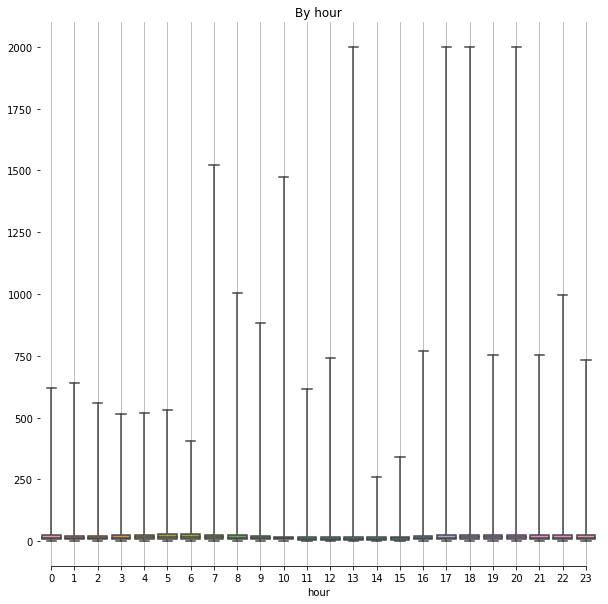

In [26]:
plot_by(air_quality_bg_data,['hour', 'P1'], title="By hour")